# spectra multi acis


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 3 evt1,flt,asol
mv -fv 3/*/*fits.gz .
gunzip -f *.fits.gz
rmdir 3/*
rmdir 3


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      126 Mb  ####################            1 s  104030.0 kb/s
  asol     fits        7 Mb  ####################          < 1 s  78678.5 kb/s
  asol     fits        6 Mb  ####################          < 1 s  72801.6 kb/s
  flt      fits        7 Kb  ####################          < 1 s  563.3 kb/s

      Total download size for ObsId 3 = 139 Mb
      Total download time for ObsId 3 = 1 s

'3/primary/pcadf057736899N004_asol1.fits.gz' -> './pcadf057736899N004_asol1.fits.gz'
'3/primary/pcadf057763996N004_asol1.fits.gz' -> './pcadf057763996N004_asol1.fits.gz'
'3/secondary/acisf00003_000N004_evt1.fits.gz' -> './acisf00003_000N004_evt1.fits.gz'
'3/secondary/acisf00003_000N004_flt1.fits.gz' -> './acisf00003_000N004_flt1.fits.gz'


## L1.5

### detect

In [3]:
pset tgdetect infile=acisf00003_000N005_evt1.fits
pset tgdetect outfile=acis_3_src1a.fits
pset tgdetect fixedcell=6
pset tgdetect snr_thresh=20
pset tgdetect snr_ratio_limit=0.25
tgdetect mode=h clobber=yes


[1] 21159
[1]+  Done                    ds9 acisf00003_000N004_evt1.fits -scale log -zoom 1 -pan to $x $y physical -region acis_3_src1a.fits -saveimage png ds9_01.png


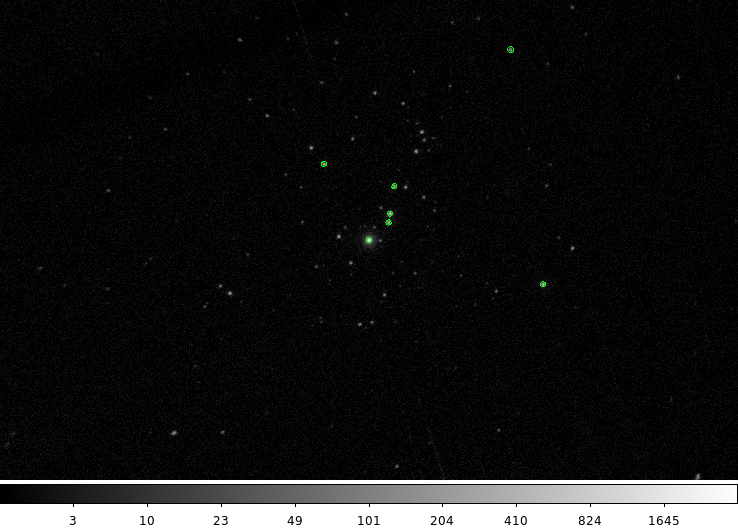

In [4]:
x=`dmkeypar acis_3_src1a.fits x echo+`
y=`dmkeypar acis_3_src1a.fits y echo+`


ds9 acisf00003_000N005_evt1.fits  -scale log -zoom 1\
  -pan to $x $y physical \
  -region acis_3_src1a.fits \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

In [5]:
dmlist acis_3_src1a.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acis_3_src1a.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCLIST                        Table        32 cols x 7        rows


### tg mask

In [6]:
pset tg_create_mask infile=acisf00003_000N005_evt1.fits
pset tg_create_mask outfile=acis_3_L1a.fits
pset tg_create_mask input_pos_tab=acis_3_src1a.fits
tg_create_mask mode=h clob+


[1] 21295
[1]+  Done                    ds9 acisf00003_000N004_evt1.fits -scale log -region acis_3_L1a.fits -saveimage png ds9_02.png


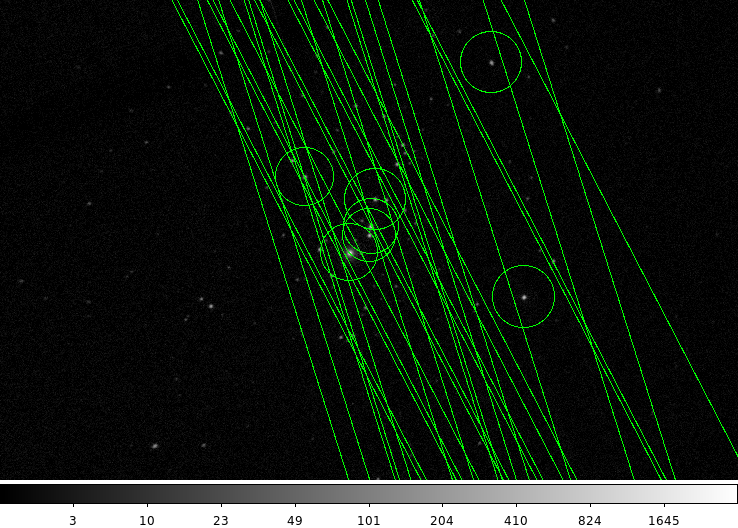

In [7]:
ds9 acisf00003_000N005_evt1.fits -scale log \
  -region acis_3_L1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [8]:
/bin/ls pcadf* > pcad.lis
punlearn tg_resolve_events
pset tg_resolve_events infile=acisf00003_000N005_evt1.fits
pset tg_resolve_events outfile=acis_3_evt1a.fits
pset tg_resolve_events regionfile=acis_3_L1a.fits
pset tg_resolve_events acaofffile=@pcad.lis
tg_resolve_events mo=h cl+

## Create L2

### status

In [9]:
dmcopy "acis_3_evt1a.fits[grade=0,2,3,4,6,status=0]" \
      acis_3_flt1_evt1a.fits opt=all clob+


### gti

In [10]:
dmcopy \
      "acis_3_flt1_evt1a.fits[EVENTS][@acisf00003_000N005_flt1.fits]" \
      acis_3_evt2.fits opt="" clob+


In [11]:
 dmappend \
      "acis_3_flt1_evt1a.fits[region][subspace -time]" \
      acis_3_evt2.fits

## Extract spectrum

In [12]:
pset tgextract infile=acis_3_evt2.fits
pset tgextract outfile=acis_3_pha2.fits
tgextract mode=h clob+


In [13]:
dmlist acis_3_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acis_3_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 84       rows
Block    3: REGION                         Table        10 cols x 252      rows


In [14]:
dmlist acis_3_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[8192]                 

# Cleanup

In [15]:
/bin/rm -f acisf* pcadf*
